# Regresión Logística para predicciones bancarias

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
data = pd.read_csv('../datasets/bank/bank.csv', sep = ";")

In [89]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [90]:
data.shape

(4119, 21)

In [91]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [92]:
data["y"] = (data['y'] == 'yes').astype(int)

In [93]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [94]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [95]:
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])

data['education'] = np.where(data['education'] == 'high.school', 'High School', data['education'])
data['education'] = np.where(data['education'] == 'professional.course', 'Professional Course', data['education'])
data['education'] = np.where(data['education'] == 'university.degree', 'University Degree', data['education'])

data['education'] = np.where(data['education'] == 'illiterate', 'Illiterate', data['education'])
data['education'] = np.where(data['education'] == 'unknown', 'Unknown', data['education'])

In [96]:
data['education'].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [97]:
data['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [98]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [99]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0,0.5,'Frecuencia de compra del producto')

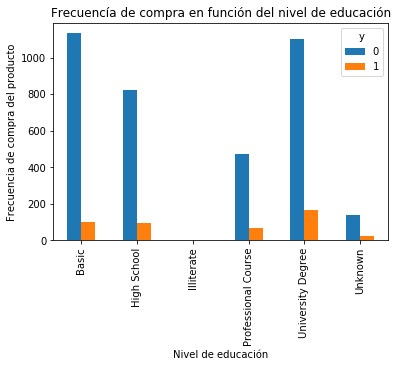

In [100]:
%matplotlib inline

pd.crosstab(data.education, data.y).plot(kind = 'bar')

plt.title('Frecuencía de compra en función del nivel de educación')
plt.xlabel('Nivel de educación')
plt.ylabel('Frecuencia de compra del producto')

Text(0,0.5,'Proporción de clientes')

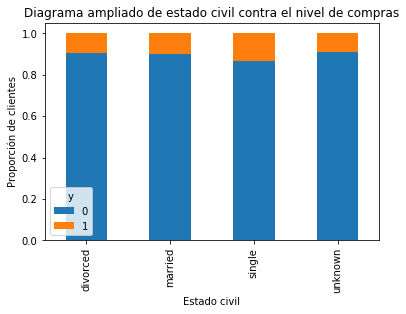

In [101]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

plt.title('Diagrama ampliado de estado civil contra el nivel de compras')
plt.xlabel('Estado civil')
plt.ylabel('Proporción de clientes')

Text(0,0.5,'Frecuencia de compra del producto')

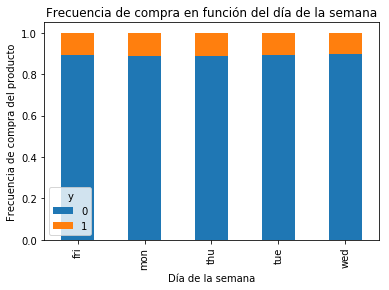

In [102]:
%matplotlib inline

table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

plt.title('Frecuencia de compra en función del día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia de compra del producto')

Text(0,0.5,'Frecuencia de compra del producto')

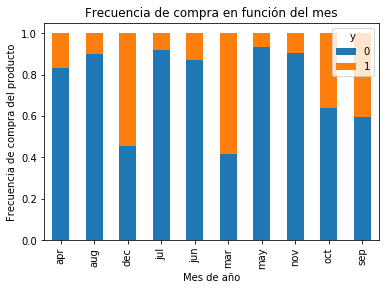

In [103]:
%matplotlib inline

table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

plt.title('Frecuencia de compra en función del mes')
plt.xlabel('Mes de año')
plt.ylabel('Frecuencia de compra del producto')

Text(0,0.5,'Frencuencia de compra del producto')

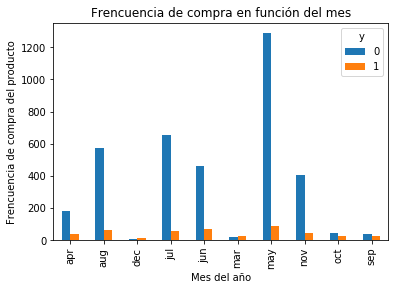

In [104]:
%matplotlib inline

table.plot(kind = 'bar', stacked = False)

plt.title('Frencuencia de compra en función del mes')
plt.xlabel('Mes del año')
plt.ylabel('Frencuencia de compra del producto')

Text(0,0.5,'Cliente')

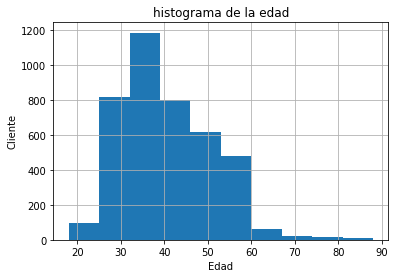

In [105]:
%matplotlib inline

data.age.hist()

plt.title('histograma de la edad')
plt.xlabel('Edad')
plt.ylabel('Cliente')

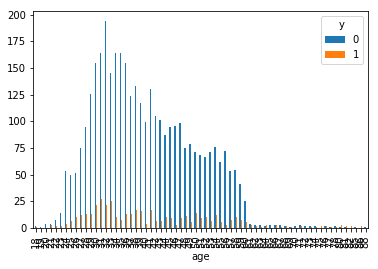

In [106]:
pd.crosstab(data.age, data.y).plot(kind = 'bar')

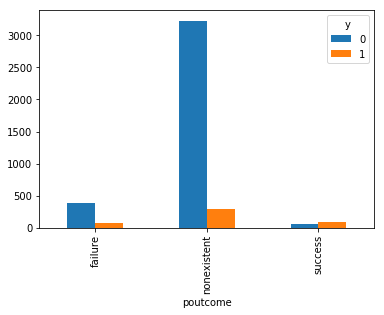

In [107]:
pd.crosstab(data.poutcome, data.y).plot(kind = 'bar')

### Conversión de variables categóricas a dummies

In [108]:
categories = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [109]:
data_vars = data.columns.values.tolist()

In [110]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ['default']]

In [111]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [112]:
bank_data_vars = bank_data.columns.values.tolist()

Y = ['y']

X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo

In [113]:
n = 12

In [114]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [115]:
lr = LogisticRegression()

In [116]:
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [117]:
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False  True False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
  True False False False False False False  True False  True]


In [118]:
print(rfe.ranking_)

[33 40 22 43  1 18 30 27  1 36  4 14  9 17 13  1 10 39  2  3  1 45 20 42 32
 47 41 16 46 23 38  8 25 11 12 19  7 31 24  5 34 26  1  1  1  1  1 21  1 44
 37 28 35 29 15  1  6  1]


In [119]:
z = zip(bank_data_vars, rfe.support_, rfe.ranking_)

In [120]:
list(z)

[('age', False, 33),
 ('duration', False, 40),
 ('campaign', False, 22),
 ('pdays', False, 43),
 ('previous', True, 1),
 ('emp.var.rate', False, 18),
 ('cons.price.idx', False, 30),
 ('cons.conf.idx', False, 27),
 ('euribor3m', True, 1),
 ('nr.employed', False, 36),
 ('y', False, 4),
 ('job_admin.', False, 14),
 ('job_blue-collar', False, 9),
 ('job_entrepreneur', False, 17),
 ('job_housemaid', False, 13),
 ('job_management', True, 1),
 ('job_retired', False, 10),
 ('job_self-employed', False, 39),
 ('job_services', False, 2),
 ('job_student', False, 3),
 ('job_technician', True, 1),
 ('job_unemployed', False, 45),
 ('job_unknown', False, 20),
 ('marital_divorced', False, 42),
 ('marital_married', False, 32),
 ('marital_single', False, 47),
 ('marital_unknown', False, 41),
 ('education_Basic', False, 16),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 23),
 ('education_Professional Course', False, 38),
 ('education_University Degree', False, 8),
 ('education_Un

In [121]:
cols = ['previous', 'euribor3m', 'job_blue-collar', 'job_retired', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_nov', 'day_of_week_wed', 'poutcome_nonexistent']

In [122]:
X = bank_data[cols]

Y = bank_data['y']

### Implementación del modelo en Python con statsmodel.api

In [123]:
import statsmodels.api as sm

In [124]:
logit_model = sm.Logit(Y, X)

In [125]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [126]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                 Logit             No. Iterations:    7.0000   
Dependent Variable:    y                 Pseudo R-squared:  0.155    
Date:                  2018-07-20 21:01  AIC:               2427.6025
No. Observations:      4119              BIC:               2503.4828
Df Model:              11                Log-Likelihood:    -1201.8  
Df Residuals:          4107              LL-Null:           -1422.9  
Converged:             1.0000            Scale:             1.0000   
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

### Implementación del modelo en Python con scikit-learn

In [127]:
from sklearn import linear_model

In [128]:
logit_model = linear_model.LogisticRegression()

logit_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [129]:
logit_model.score(X, Y)

0.89633406166545282

In [130]:
1 - Y.mean()

0.8905074047098811

In [131]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.507657135437]
1,euribor3m,[-0.54649613281]
2,job_blue-collar,[-0.359155362198]
3,job_retired,[0.356038388783]
4,month_aug,[0.625398308645]
5,month_dec,[1.1822172986]
6,month_jul,[0.962263362765]
7,month_jun,[1.05431792487]
8,month_mar,[1.63063662979]
9,month_nov,[0.451957681826]


### Validación del modelo logístico

In [132]:
from sklearn.cross_validation import train_test_split

In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [134]:
lm = linear_model.LogisticRegression()

lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [135]:
from IPython.display import display, Math, Latex

In [136]:
display(Math(r'Y_p = \begin{cases} 0& si\ p\leq 0.5\\ 1 & si\ p > 0.5\end{cases} '))

<IPython.core.display.Math object>

In [137]:
probs = lm.predict_proba(X_test)

In [138]:
probs

array([[ 0.95462912,  0.04537088],
       [ 0.83762689,  0.16237311],
       [ 0.93244632,  0.06755368],
       ..., 
       [ 0.65044409,  0.34955591],
       [ 0.97383524,  0.02616476],
       [ 0.57021896,  0.42978104]])

In [139]:
prediction = lm.predict(X_test)

In [140]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [141]:
display(Math(r'\varepsilon\in (0, 1), Y_p = \begin{cases} 0& si\ p\leq \varepsilon\\ 1 & si\ p > \epsilon\end{cases} '))

<IPython.core.display.Math object>

In [142]:
prob = probs[:, 1]

prob_df = pd.DataFrame(prob)

threshold = 0.1

prob_df['prediction'] = np.where(prob_df[0] > threshold, 1, 0)

prob_df.head()

,0,prediction
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0


In [143]:
pd.crosstab(prob_df.prediction, columns = 'count')

col_0,count
prediction,
0,846
1,390


In [144]:
390 / len(prob_df) * 100

31.55339805825243

In [145]:
threshold = 0.15

prob_df['prediction'] = np.where(prob_df[0] > threshold, 1, 0)

pd.crosstab(prob_df.prediction, columns = 'count')

col_0,count
prediction,
0,905
1,331


In [146]:
331 / len(prob_df) * 100

26.779935275080906

In [147]:
threshold = 0.05

prob_df['prediction'] = np.where(prob_df[0] > threshold, 1, 0)

pd.crosstab(prob_df.prediction, columns = 'count')

col_0,count
prediction,
0,504
1,732


In [148]:
732 / len(prob_df) * 100

59.22330097087378

In [149]:
from sklearn import metrics

In [150]:
metrics.accuracy_score(Y_test, prediction)

0.90048543689320393

### Validación cruzada

In [151]:
from sklearn.cross_validation import cross_val_score

In [152]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring = 'accuracy', cv = 2000)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 451 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=2000.
  % (min_labels, self.n_folds)), Warning)


In [153]:
scores

array([ 0.66666667,  1.        ,  0.66666667, ...,  1.        ,
        1.        ,  1.        ])

In [154]:
scores.mean()

0.92508333333333326

### Matrices de Confusión y curvas ROC

In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [156]:
lm = linear_model.LogisticRegression()

lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [157]:
probs = lm.predict_proba(X_test)

In [158]:
prob = probs[:, 1]

prob_df = pd.DataFrame(prob)

threshold = 0.1

prob_df['prediction'] = np.where(prob_df[0] > threshold, 1, 0)

prob_df['actual'] = list(Y_test)

prob_df.head()

,0,prediction,actual
0,0.045371,0,0
1,0.162373,1,0
2,0.067554,0,0
3,0.062144,0,0
4,0.041582,0,0


In [159]:
confusion_matrix = pd.crosstab(prob_df.actual, prob_df.prediction)

In [160]:
confusion_matrix

prediction,0,1
actual,,
0,806,308
1,40,82


In [161]:
TN = confusion_matrix[0][0]

TP = confusion_matrix[1][1]

FP = confusion_matrix[0][1]

FN = confusion_matrix[1][0]

In [162]:
sens = TP / (TP + FN)

sens

0.21025641025641026

In [163]:
espc_1 = 1 - TN / (TN + FP)

espc_1

0.047281323877068515

In [164]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25]
sensibilities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df['prediction'] = np.where(prob_df[0] > t, 1, 0)
    prob_df['actual'] = list(Y_test)
    confusion_matrix = pd.crosstab(prob_df.actual, prob_df.prediction)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FN = confusion_matrix[0][1]
    FP = confusion_matrix[1][0]
    
    sens = TP / (TP + FN)
    sensibilities.append(sens)
    espc_1 = 1 - TN / (TN + FP)
    especifities_1.append(espc_1)
    
sensibilities.append(0)
especifities_1.append(0)

In [165]:
sensibilities

[1,
 0.93442622950819676,
 0.84426229508196726,
 0.68032786885245899,
 0.67213114754098358,
 0.66393442622950816,
 0.64754098360655743,
 0.51639344262295084,
 0.45901639344262296,
 0.40163934426229508,
 0]

In [166]:
especifities_1

[1,
 0.7782764811490126,
 0.56463195691202872,
 0.29892280071813282,
 0.27648114901256737,
 0.24596050269299818,
 0.22621184919210058,
 0.12387791741472176,
 0.1077199281867145,
 0.071813285457809739,
 0]

In [167]:
import matplotlib.pyplot as plt

Text(0.5,1,'Curva ROC')

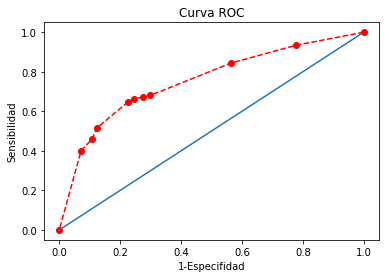

In [168]:
%matplotlib inline

plt.plot(especifities_1, sensibilities, marker = 'o', linestyle = '--', color = 'r')

x = [i * 0.01 for i in range(100)]

y = [i * 0.01 for i in range(100)]

plt.plot(x, y)

plt.xlabel('1-Especifidad')

plt.ylabel('Sensibilidad')

plt.title('Curva ROC')

In [170]:
from sklearn import metrics
from ggplot import * 

In [171]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [182]:
df = pd.DataFrame({
    "esp": espc_1,
    "sens": sensit
})

In [183]:
df.head()

,esp,sens
0,0.000000,0.008197
1,0.000000,0.024590
2,0.000000,0.032787
3,0.002693,0.032787
4,0.002693,0.049180


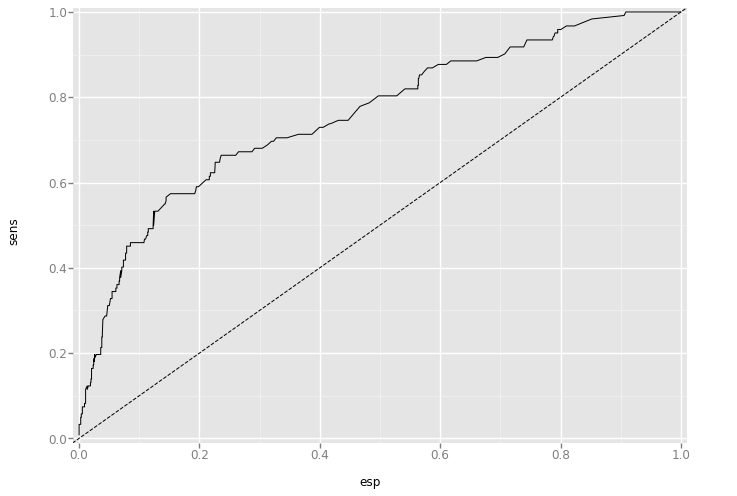

<ggplot: (-9223372029301497049)>

In [184]:
ggplot(df, aes(x = "esp", y = "sens")) + geom_line() + geom_abline(linetype = 'dashed') + xlim(-0.01, 1.01) + ylim(-0.01, 1.01)

In [176]:
auc = metrics.auc(espc_1, sensit)

auc

0.75757129823115643

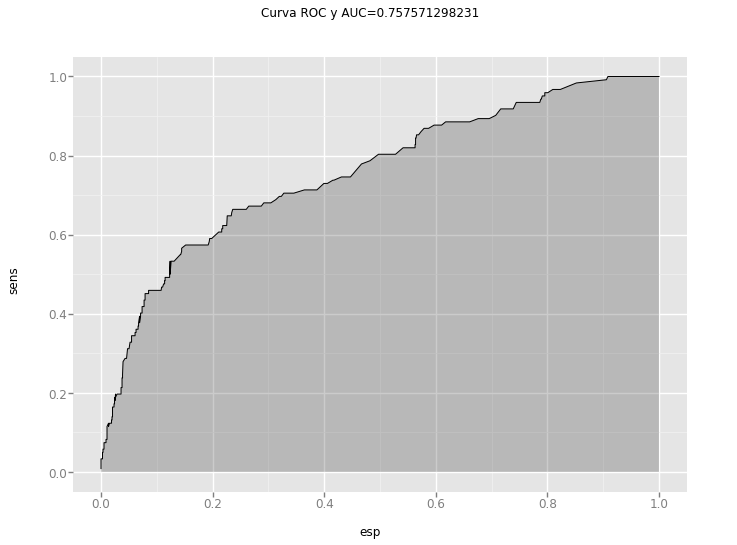

<ggplot: (7553942813)>

In [185]:
ggplot(df, aes(x = 'esp', y = 'sens')) + geom_area(alpha = 0.25) + geom_line(aes(y = 'sens')) + ggtitle('Curva ROC y AUC=%s' % str(auc))